# NLP CLASSIFICATION & SENTIMENT ANALYSIS

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")
from langdetect import detect
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
df = pd.read_csv("restaurant.csv")

In [3]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [4]:
df.stars.value_counts()

5    4247
4    2636
3    1561
1    1056
2     917
Name: stars, dtype: int64

In [5]:
df.loc[df.stars == 3,"sentiment"] = "neutral"
df.loc[df.stars > 3,"sentiment"] = "positive"
df.loc[df.stars < 3,"sentiment"] = "negative"
df = df[["stars","sentiment","text"]]
df.head()

,stars,sentiment,text
0,5,positive,After getting food poisoning at the Palms hote...
1,4,positive,"""A feast worthy of Gods""\n\nBaccarnal Buffet i..."
2,4,positive,The crab legs are better than the ones at Wick...
3,1,negative,Not worth it! Too salty food and expensive! Th...
4,5,positive,I would give this infinite stars if I could. M...


In [6]:
df.sentiment.value_counts()

positive    6883
negative    1973
neutral     1561
Name: sentiment, dtype: int64

In [7]:
df["text"]=df["text"].str.lower().replace("[^\w\s]","").str.replace("\d+","").str.replace("\n"," ").str.replace("\r","")

In [8]:
df.text.head()

0    after getting food poisoning at the palms hote...
1    "a feast worthy of gods"  baccarnal buffet in ...
2    the crab legs are better than the ones at wick...
3    not worth it! too salty food and expensive! th...
4    i would give this infinite stars if i could. m...
Name: text, dtype: object

In [9]:
df["language"] = df["text"].apply(detect)

In [10]:
df = df[df["language"] == "en"]

In [11]:
df.sentiment.value_counts()

positive    6854
negative    1964
neutral     1557
Name: sentiment, dtype: int64

In [12]:
TextBlob(df.text[20]).sentiment

Sentiment(polarity=0.29333333333333333, subjectivity=0.5293333333333333)

In [13]:
df[["polarity","subjectivity"]] = df["text"].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [14]:
df.head()

,stars,sentiment,text,language,polarity,subjectivity
0,5,positive,after getting food poisoning at the palms hote...,en,0.371429,0.605702
1,4,positive,"""a feast worthy of gods"" baccarnal buffet in ...",en,0.219409,0.537292
2,4,positive,the crab legs are better than the ones at wick...,en,-0.134722,0.731944
3,1,negative,not worth it! too salty food and expensive! th...,en,-0.484375,0.400000
4,5,positive,i would give this infinite stars if i could. m...,en,0.362500,0.725000


In [39]:
def create_word_cloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", mask=mask, max_words=25000, stopwords=stopwords)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Created Successfully")
    path = "wc.png"
    display(Image.open(path))

In [40]:
text1 = df[df["stars"] == 1]

Word Cloud Created Successfully


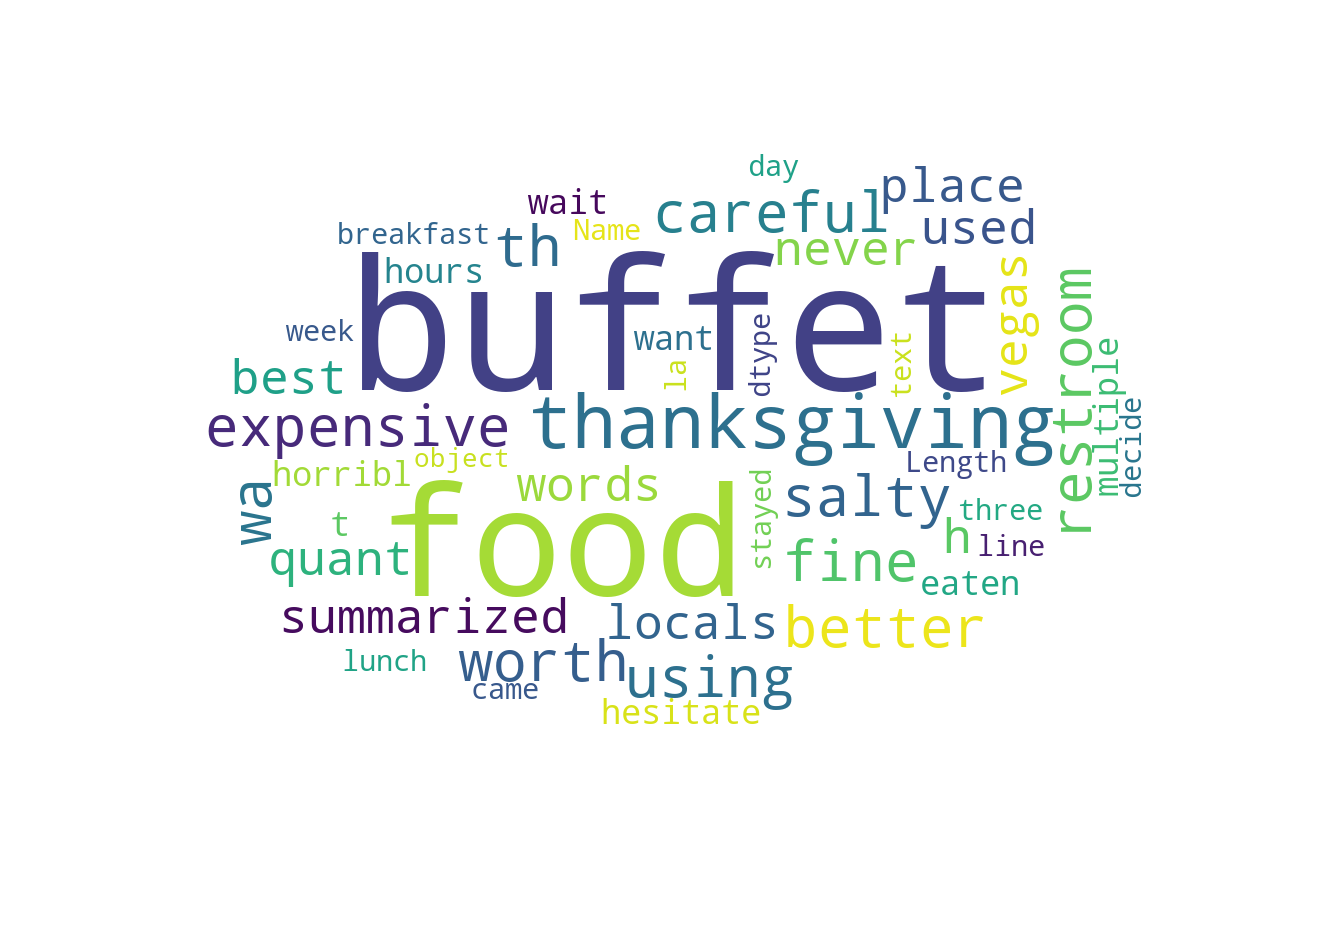

In [49]:
create_word_cloud(text1.text)

In [50]:
text5 = df[df["stars"] == 5]

Word Cloud Created Successfully


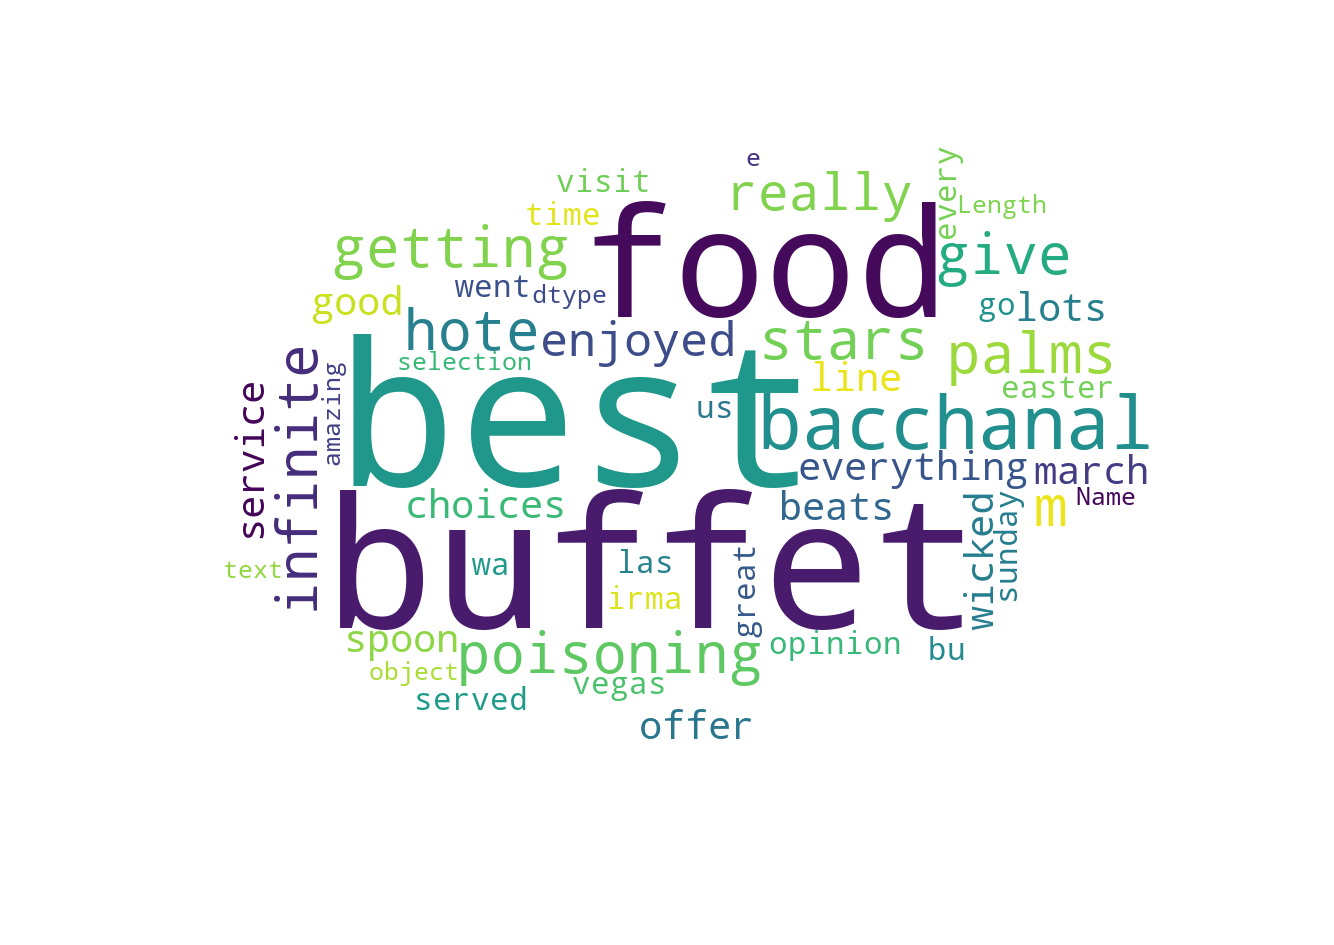

In [51]:
create_word_cloud(text5.text)

In [15]:
x = df.text
y = df.sentiment



In [17]:
type(x)

pandas.core.series.Series

In [16]:
x

0        after getting food poisoning at the palms hote...
1        "a feast worthy of gods"  baccarnal buffet in ...
2        the crab legs are better than the ones at wick...
3        not worth it! too salty food and expensive! th...
4        i would give this infinite stars if i could. m...
                               ...                        
10412    best buffet ever! irma was great, served us be...
10413    hollllllyyyy moleyyyy!   this buffet was one f...
10414    the selection is amazing and all the food is e...
10415    one of the best buffets i've had in vegas. my ...
10416    i got a chance to go to the bacchanal buffett ...
Name: text, Length: 10375, dtype: object

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [87]:
vect = CountVectorizer(stop_words="english")

x_train_dtm = vect.fit_transform(x_train)

x_test_dtm = vect.transform(x_test)

x_train_dtm = pd.DataFrame(x_train_dtm.toarray(), columns=vect.get_feature_names())

predict = GradientBoostingClassifier().fit(x_train_dtm,y_train).predict(x_test_dtm)




NameError: name 'metrics' is not defined

In [89]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, predict))

0.749123831775701


In [77]:
a = df[df["sentiment"]=="negative"]
a = a.reset_index()

In [102]:
vect = TfidfVectorizer(stop_words="english",ngram_range=(1, 1))
dtm = vect.fit_transform(a.text)
features = vect.get_feature_names()
dtm.shape

(1964, 8791)

In [103]:
def summarize():
    review_length=0
    while review_length < 300:
        review_id = np.random.randint(0, len(a))
        review_text = str(a.text[review_id])
        review_length = len(review_text)
        
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
            
            
    print("Top Scoring Words: ")
    top_scores = sorted(word_scores.items(),key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print(word)
        
    print("\n"+ review_text)

In [105]:
summarize()

Top Scoring Words: 
palms
breakfast
saved
daughter
offering

my daughter saved her money to treat me for a birthday bacchanal breakfast buffet. it would be our first time and we were looking forward to experiencing one of the top-rated buffets in vegas. we wanted to verify how much they were charging at the time, so we could have budgeted for it correctly. we called the casino twice; first time was before we left for vacation from tucson. the second time was when we arrived in vegas the afternoon before we planned to attend the bacchanal. both times they told us "around $". the next morning we went to the buffet (after paying for parking), waited in line for a bit, just to be surprised that they were charging over $ for a holiday brunch. the gal at the counter pointed out that although it was july nd, they were offering a premium holiday brunch. i spoke with the restaurant manager raz p. to explain that we were told $ on the phone. without an ounce of compassion, he told us to come bac